In [1]:
## Improts Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import math 

In [2]:
# Reads data files and merges 2 csv files in one 
# Display the data table for preview
mouse_metadata = pd.read_csv('../Resources/Mouse_metadata.csv')
study_result = pd.read_csv('../Resources/Study_results.csv')
pharmaceuticas_info = pd.merge(study_result, mouse_metadata, how = 'left', on='Mouse ID')
pharmaceuticas_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
total_number_of_mice = len(pharmaceuticas_info["Mouse ID"].unique())
total_number_of_mice

249

In [4]:
pharmaceuticas_info.describe()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [5]:
# Gets the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_rows = pharmaceuticas_info[pharmaceuticas_info.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Drops the Mouse Id with duplicate Timepoint.
# Displays the clean data.
clean_pharmaceuticas_data_df = pharmaceuticas_info[pharmaceuticas_info["Mouse ID"]!='g989'].reset_index(drop = True)
clean_pharmaceuticas_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Counts the number of unique Mouse ID after cleaning up the data.
clean_pharmaceuticas_data_df['Mouse ID'].nunique()

248

In [8]:
# Groupby by drug regemins and performs different aggregations.
statistic_summary = clean_pharmaceuticas_data_df.groupby('Drug Regimen')
mean_Tumor_Volume = pd.DataFrame(statistic_summary['Tumor Volume (mm3)'].mean())
median_Tumor_Volume = pd.DataFrame(statistic_summary['Tumor Volume (mm3)'].median())
variance_Tumor_Volume = pd.DataFrame(statistic_summary['Tumor Volume (mm3)'].var())
stdev_Tumor_Volume = pd.DataFrame(statistic_summary['Tumor Volume (mm3)'].std())
sem_Tumor_Volume = pd.DataFrame(statistic_summary['Tumor Volume (mm3)'].sem())

In [9]:
# Creats a new dataframe storing all those above calculation and displays it.
statistic_summary_df = pd.concat(
    [mean_Tumor_Volume,
     median_Tumor_Volume,
     variance_Tumor_Volume,
     stdev_Tumor_Volume,
     sem_Tumor_Volume
], axis = 1)
statistic_summary_df.columns = ['Mean' , 'Median', 'Variance', 'standard Deviation', 'SEM']
statistic_summary_df

,Mean,Median,Variance,standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Calculate total number of mouse id that were taking the particualr drug regimens.
total_drug_regimen = clean_pharmaceuticas_data_df.groupby('Drug Regimen')
total_mouse_timepoint = pd.DataFrame(total_drug_regimen['Mouse ID'].count())
total_mouse_timepoint.columns = [ 'Total Mice']
total_mouse_timepoint

,Total Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


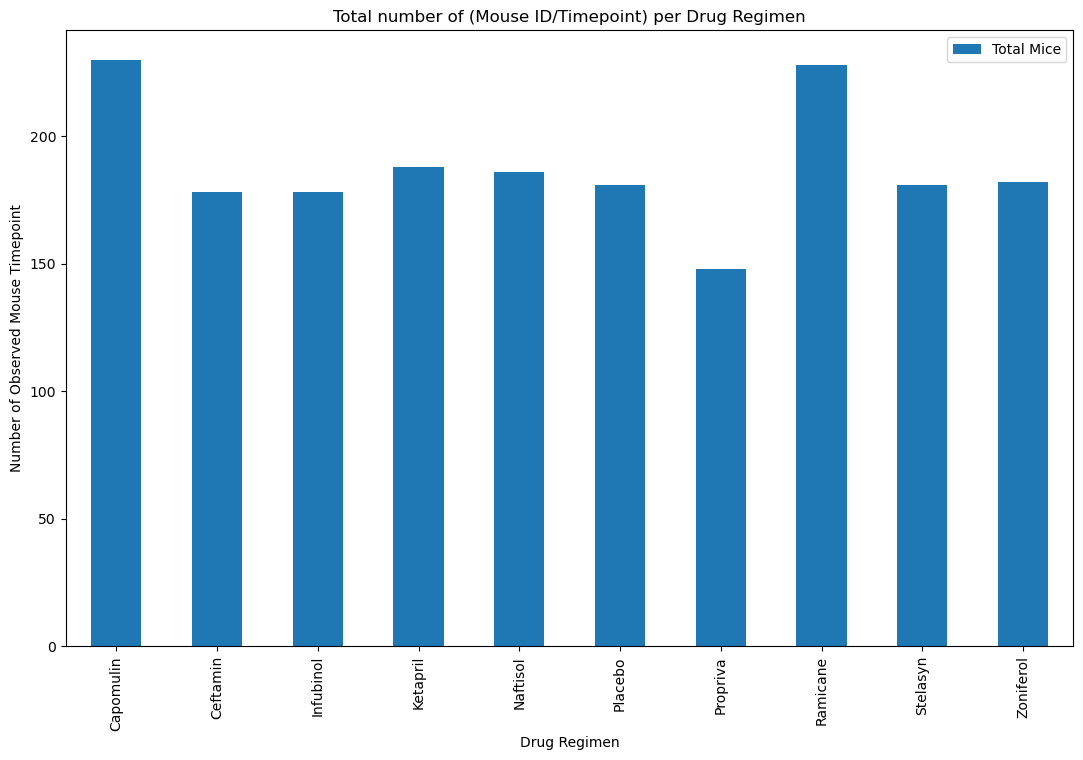

In [11]:
# Plots the bar graph with all those numebr of observerd mouse using pandas
total_mouse_timepoint.plot(kind="bar", figsize=(13,8))

# Set a title for the chart
plt.title("Total number of (Mouse ID/Timepoint) per Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoint")
plt.show()


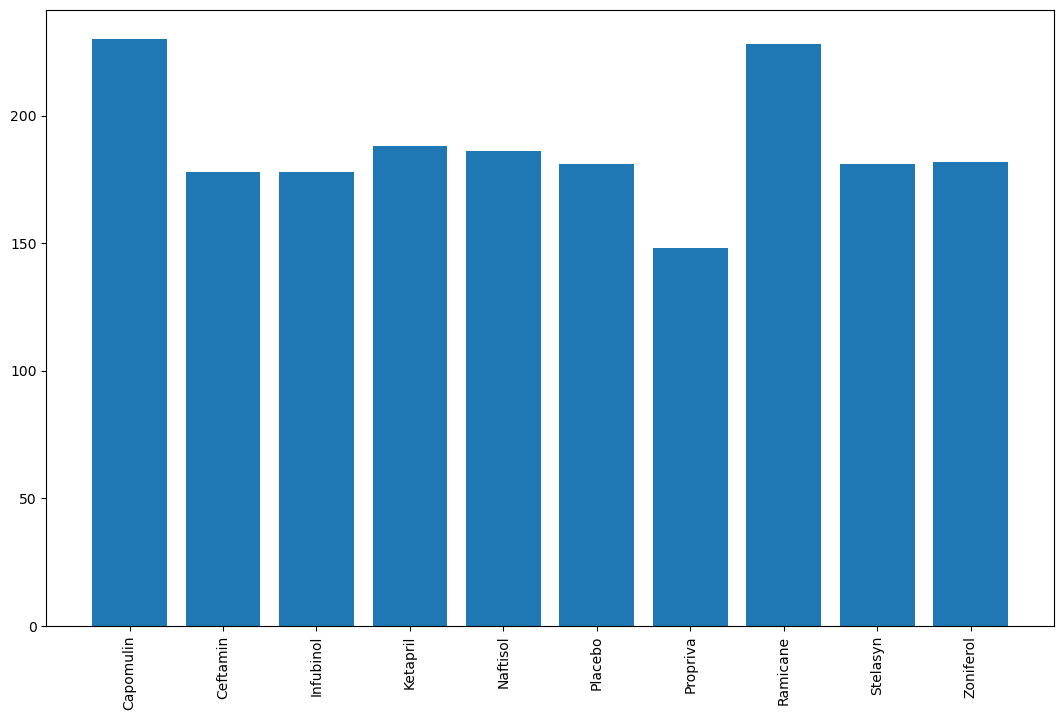

In [12]:
# Generates a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
x_axis = np.arange(len(total_mouse_timepoint))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(13,8))
plt.bar(x_axis, total_mouse_timepoint["Total Mice"])
plt.xticks(tick_locations, total_mouse_timepoint.index, rotation="vertical")
plt.show()

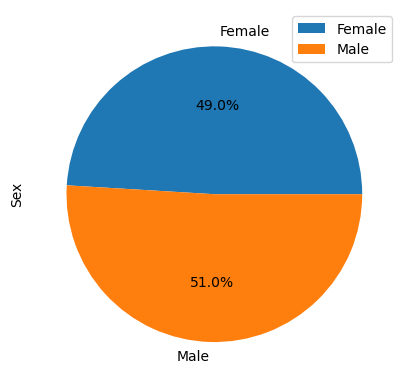

In [13]:
# Groupby by sex and generates the pie chart to show the number male and female mouse mice using Pandas.
clean_pharmaceuticas_data_df.groupby(['Sex']).count().plot(kind= "pie", y='Mouse ID', autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

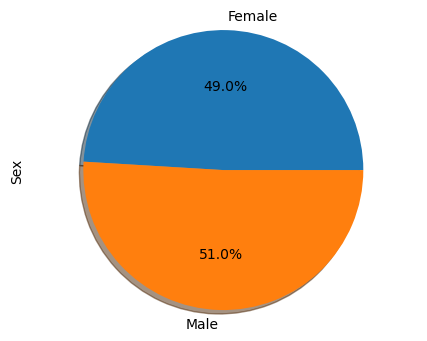

In [14]:
# Groupby by sex and generates the pie chart to show the number male and female mouse mice using pyplot.
mice_per_gender= clean_pharmaceuticas_data_df.groupby('Sex')
total_mice_per_gender = pd.DataFrame(mice_per_gender['Mouse ID'].count())
total_mice_per_gender
total_mice_per_gender.columns = [ 'Gender Size']
labels = ['Female', 'Male']
mice_per_gender_data = total_mice_per_gender['Gender Size']
fig = plt.figure(figsize=(5, 4))
plt.pie(mice_per_gender_data, labels=labels,
        autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.ylabel("Sex")

plt.show()


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_data_df = pd.DataFrame(clean_pharmaceuticas_data_df.groupby('Mouse ID').last())
selected_data_df = selected_data_df[selected_data_df['Drug Regimen'].isin(treatment_regimen)]

merged_data = pd.merge(selected_data_df, clean_pharmaceuticas_data_df)
merged_data

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID
0,45,67.973419,2,Infubinol,Female,20,23,a203
1,45,65.525743,1,Infubinol,Female,21,25,a251
2,45,62.999356,3,Ceftamin,Female,20,28,a275
3,45,38.407618,1,Ramicane,Male,3,22,a411
4,45,43.047543,0,Ramicane,Female,10,25,a444
...,...,...,...,...,...,...,...,...
95,45,68.594745,4,Ceftamin,Female,6,27,y769
96,45,31.896238,2,Capomulin,Male,17,17,y793
97,45,64.729837,3,Ceftamin,Male,23,26,y865
98,45,30.638696,0,Ramicane,Male,11,16,z578


In [16]:
# Loops through each drug regimen and append it into the list.
tumor_volume_data = []
for drug in treatment_regimen:
    a = merged_data[merged_data['Drug Regimen'] == drug]
    tumor_volume_data.append(a['Tumor Volume (mm3)'].tolist())

In [17]:
# Calculates quartile, finds out the upper and lower bound 
# Finds out the outlier
for index in range(len(treatment_regimen)):
    drug_name = treatment_regimen[index]
    tumor_volume_final = sorted(tumor_volume_data[index])
    tumor_volume_final_df = pd.DataFrame(tumor_volume_final)
    tumor_volume_final_series = tumor_volume_final_df[0]
    quartiles = tumor_volume_final_series.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier =[]
    for value in tumor_volume_final:
        if value < lower_bound or value > upper_bound:
            outlier.append(value)
    print(f"{drug_name}'s potential outliers:{outlier}")
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers in {drug_name}.")

Capomulin's potential outliers:[]
Values below 20.70456164999999 and above 51.83201549 could be outliers in Capomulin.
Ramicane's potential outliers:[]
Values below 17.912664470000003 and above 54.30681135 could be outliers in Ramicane.
Infubinol's potential outliers:[36.3213458]
Values below 36.83290494999999 and above 82.74144559000001 could be outliers in Infubinol.
Ceftamin's potential outliers:[]
Values below 25.355449580000002 and above 87.66645829999999 could be outliers in Ceftamin.


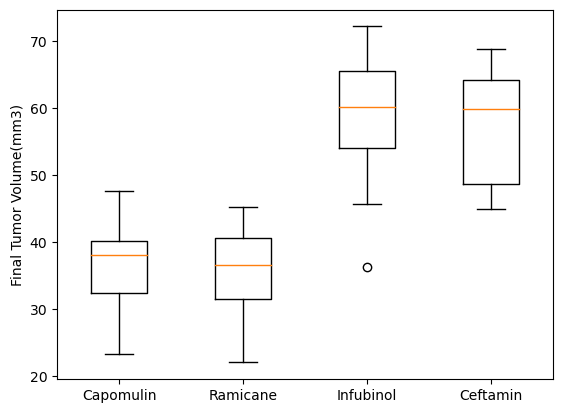

In [18]:
# Generates a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.boxplot(tumor_volume_data, labels=treatment_regimen)
plt.show()

In [19]:
# Fiters all the mouse with id l509
filter_regimen_capomulin= clean_pharmaceuticas_data_df[(clean_pharmaceuticas_data_df['Drug Regimen'] == 'Capomulin') & 
          (clean_pharmaceuticas_data_df['Mouse ID'] == 'l509')]
filter_regimen_capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,l509,0,45.000000,0,Capomulin,Male,17,21
251,l509,5,45.851193,0,Capomulin,Male,17,21
535,l509,10,46.759074,0,Capomulin,Male,17,21
873,l509,15,47.488599,1,Capomulin,Male,17,21
973,l509,20,48.070452,2,Capomulin,Male,17,21
1136,l509,25,44.006257,2,Capomulin,Male,17,21
1402,l509,30,44.708055,2,Capomulin,Male,17,21
1487,l509,35,40.207288,2,Capomulin,Male,17,21
1710,l509,40,40.770813,2,Capomulin,Male,17,21
1758,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0, 0.5, 'Tumor Volume (mm3)')

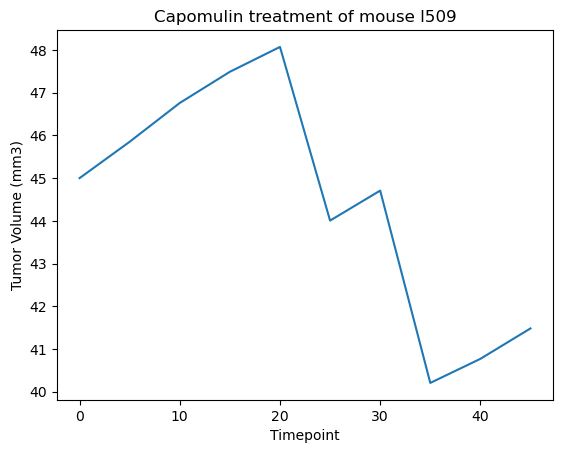

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_timepoint = filter_regimen_capomulin['Timepoint'].tolist()
capomulin_tumor_volume = filter_regimen_capomulin['Tumor Volume (mm3)'].tolist()
plt.plot(capomulin_timepoint, capomulin_tumor_volume)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

In [21]:
# Filters out all the data for the drug regimen is Capomulin
filter_regimen_capomuline_entire_mouse= clean_pharmaceuticas_data_df[(clean_pharmaceuticas_data_df['Drug Regimen'] == 'Capomulin')]
filter_regimen_capomuline_entire_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
224,j246,0,45.000000,0,Capomulin,Female,21,21
225,r554,0,45.000000,0,Capomulin,Female,8,17
226,s185,0,45.000000,0,Capomulin,Female,3,17
227,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23
1846,j119,45,38.125164,1,Capomulin,Female,7,23
1865,i557,45,47.685963,1,Capomulin,Female,1,24
1875,r944,45,41.581521,2,Capomulin,Male,12,25


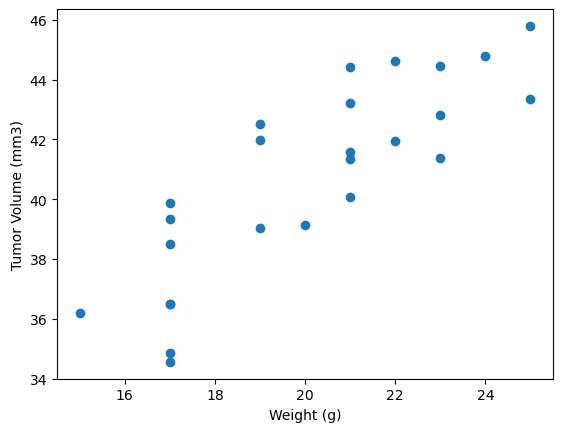

In [22]:
# Group by weight and mouse id
capomuline_by_weight_mouse_id = filter_regimen_capomuline_entire_mouse.groupby(['Weight (g)', 'Mouse ID'])
capomuline_by_avg_tumor_volume = pd.DataFrame(capomuline_by_weight_mouse_id['Tumor Volume (mm3)'].mean()).reset_index()

# Find unique weight and corresponding average tumor volumes across entire polulation
unique_weight = capomuline_by_avg_tumor_volume['Weight (g)']
average_tumor_volume = capomuline_by_avg_tumor_volume['Tumor Volume (mm3)']

plt.scatter(unique_weight, average_tumor_volume)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# For mouse weight and average observed tumor volume for the entire Capomulin regimen
capomuline_by_weight_mouse_id = filter_regimen_capomuline_entire_mouse.groupby(['Weight (g)', 'Mouse ID'])
capomuline_by_avg_tumor_volume = pd.DataFrame(capomuline_by_weight_mouse_id['Tumor Volume (mm3)'].mean()).reset_index()
unique_weight = capomuline_by_avg_tumor_volume['Weight (g)']
average_tumor_volume = capomuline_by_avg_tumor_volume['Tumor Volume (mm3)']

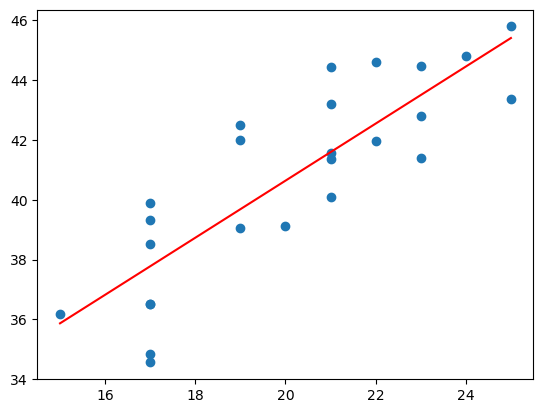

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(unique_weight, average_tumor_volume)
regress_values = unique_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(unique_weight, average_tumor_volume)
plt.plot(unique_weight,regress_values,"r-")
# plt.ylabel("Tumor Volume (mm3)")
# plt.xlabel("Weight (g)")
plt.show()